In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style(style='darkgrid') 
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv")
df['date'] = pd.to_datetime(df['date'])
# df.info()

In [3]:
print('duplicated rows:', df.duplicated().sum())
print('\n -- empty cells ')
print(np.sum(df.isna()))

duplicated rows: 0

 -- empty cells 
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


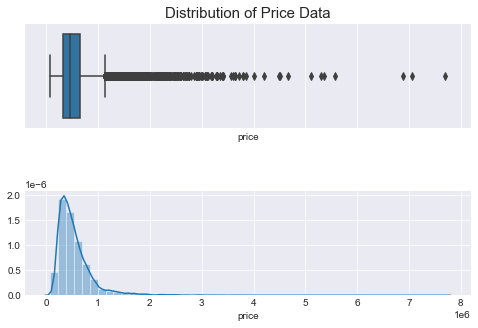

In [5]:


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
#plt.title('Distribution of Price Data')
plt.subplots_adjust(hspace=0.6)


sns.boxplot(x="price", data=df, ax=ax1)
sns.distplot(df.price, kde=True, hist=True)
ax1.set_title('Distribution of Price Data', fontsize=15)

plt.show()

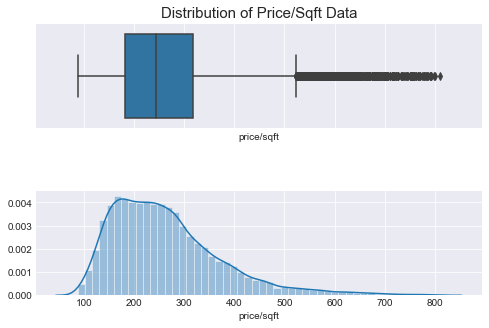

In [6]:
df['price/sqft'] = df['price'] / df['sqft_living']

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
#plt.title('Distribution of Price Data')
plt.subplots_adjust(hspace=0.6)


sns.boxplot(x="price/sqft", data=df, ax=ax1)
sns.distplot(df['price/sqft'], kde=True, hist=True)
ax1.set_title('Distribution of Price/Sqft Data', fontsize=15)

plt.show()

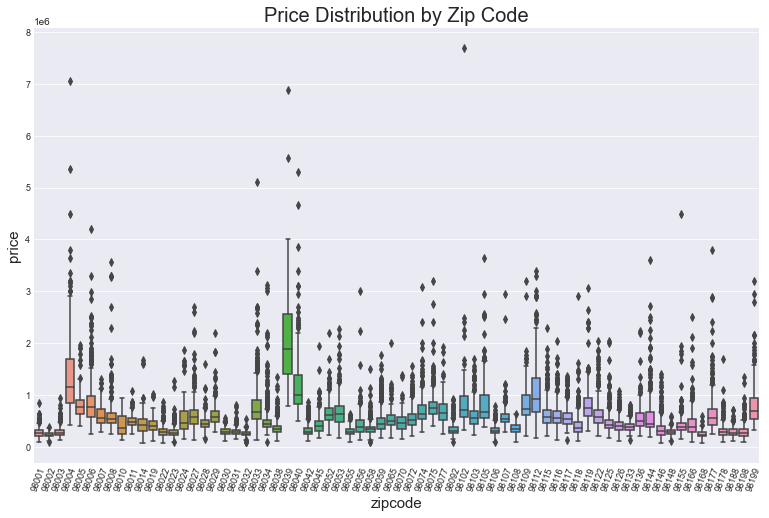

In [7]:
plt.figure(figsize=(13,8))

b = sns.boxplot(x="zipcode", y=('price'), data=df)
plt.title("Price Distribution by Zip Code",fontsize=20)
b.set_xlabel("zipcode",fontsize=15)
b.set_ylabel("price",fontsize=15)
b.tick_params(labelsize=9)

plt.xticks(rotation=70)

plt.show()

C:\Users\felip\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


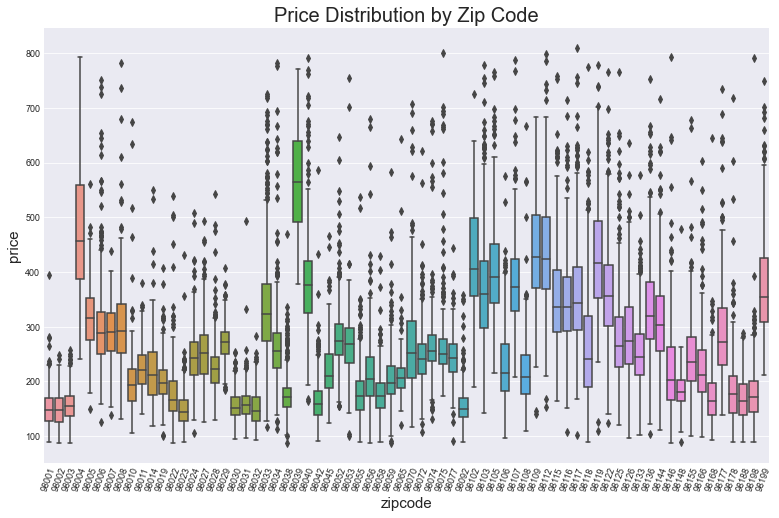

In [8]:
plt.figure(figsize=(13,8))
data = df[['price', 'sqft_living', 'zipcode']]
data['price/sqft'] = df['price']/df['sqft_living']
b = sns.boxplot(x="zipcode", y=('price/sqft'), data=data)
plt.title("Price Distribution by Zip Code",fontsize=20)
b.set_xlabel("zipcode",fontsize=15)
b.set_ylabel("price",fontsize=15)
b.tick_params(labelsize=9)

plt.xticks(rotation=70)

plt.show()

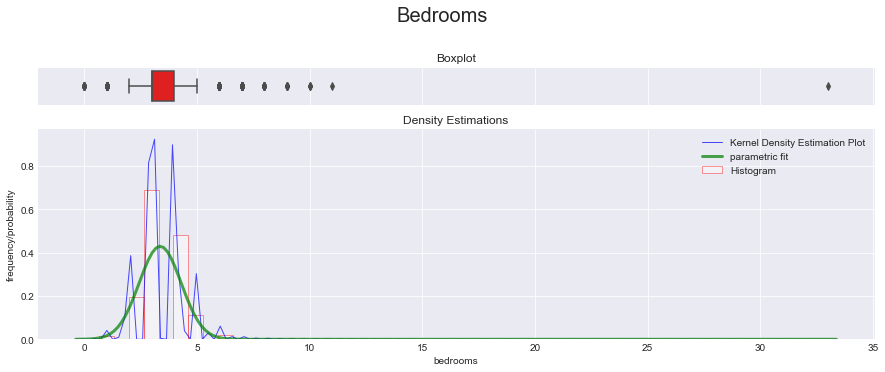

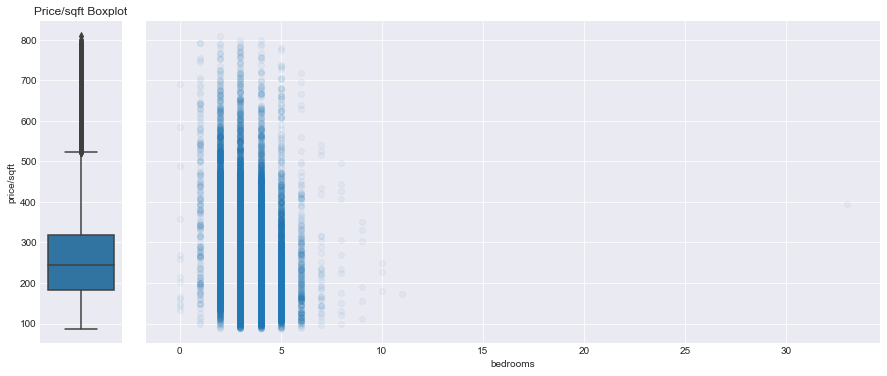

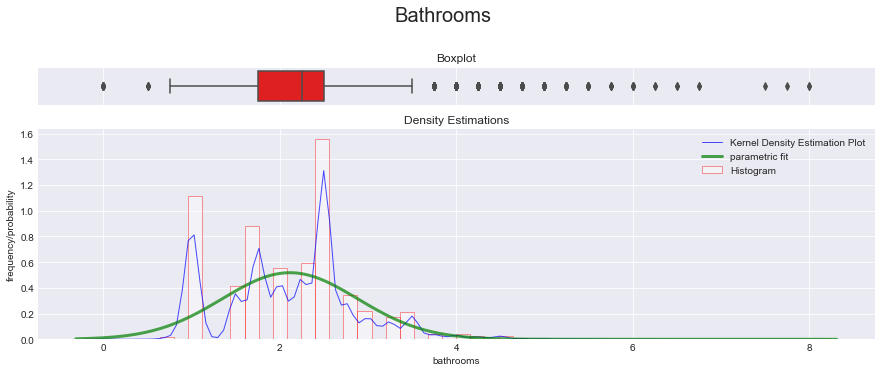

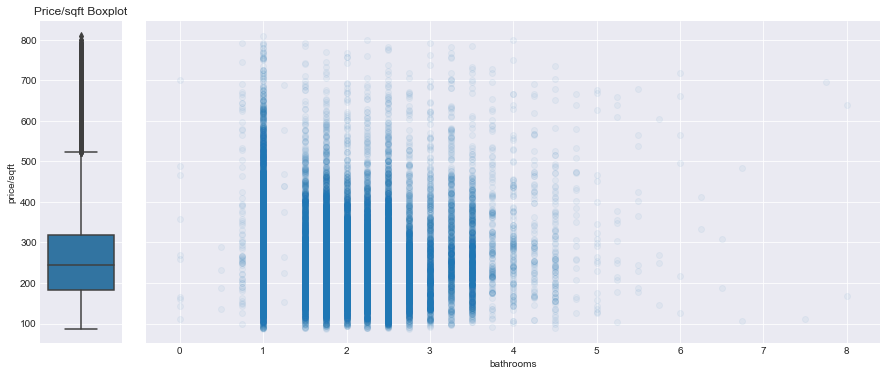

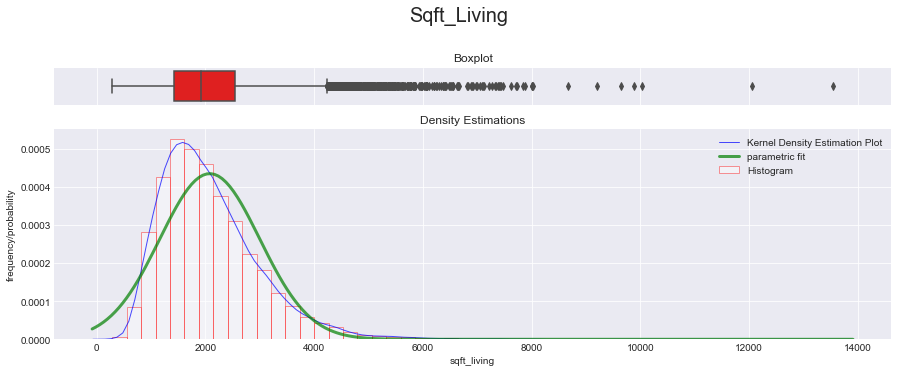

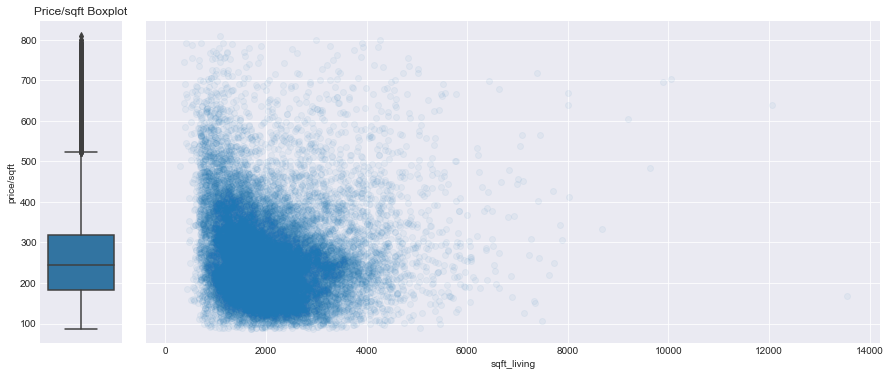

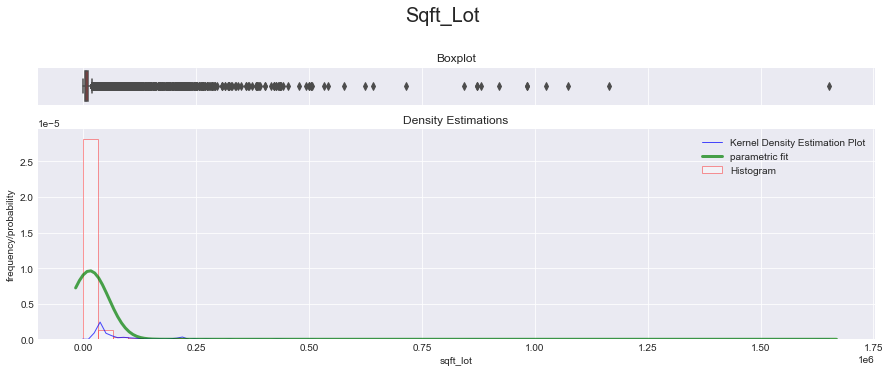

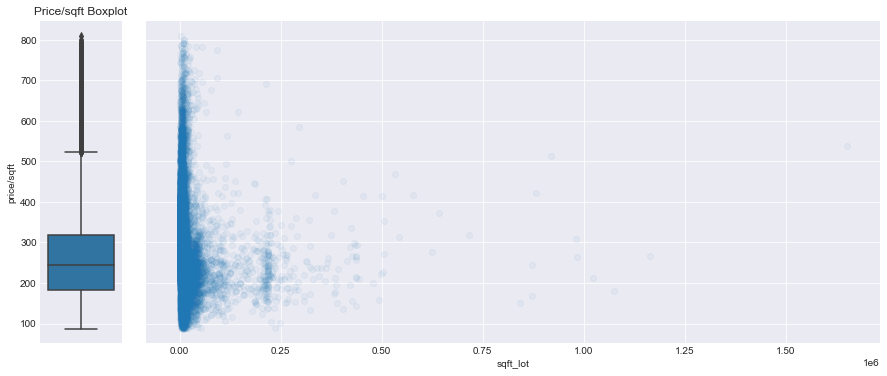

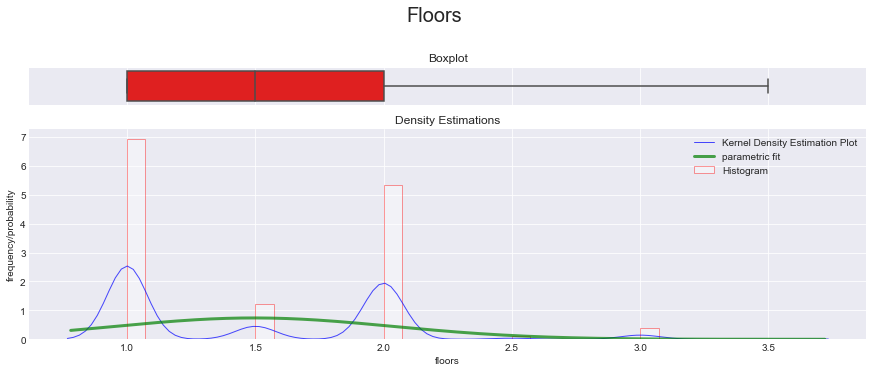

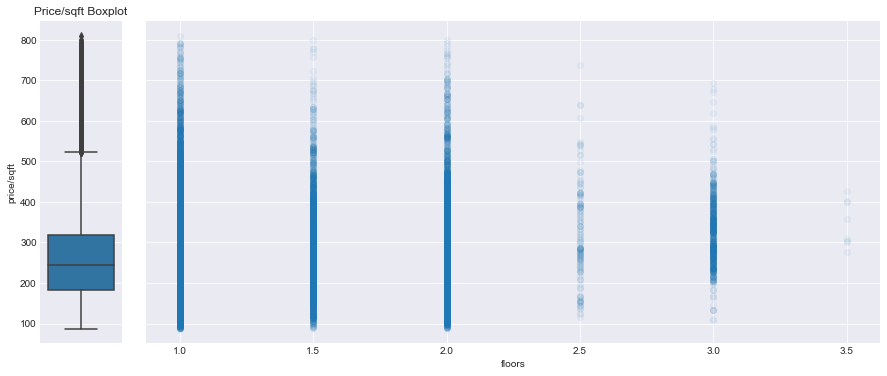

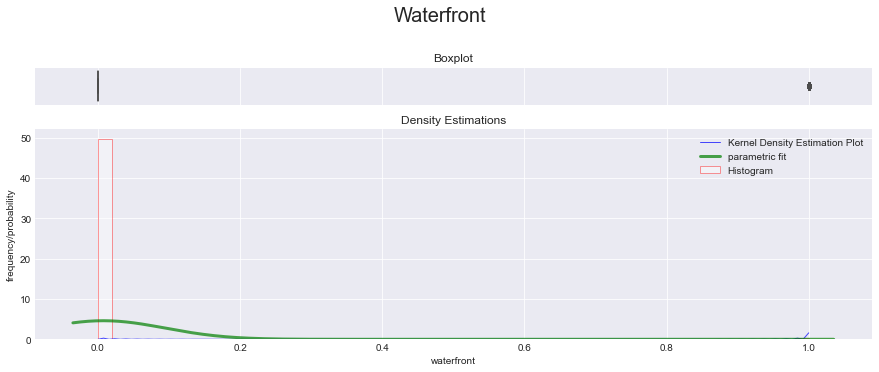

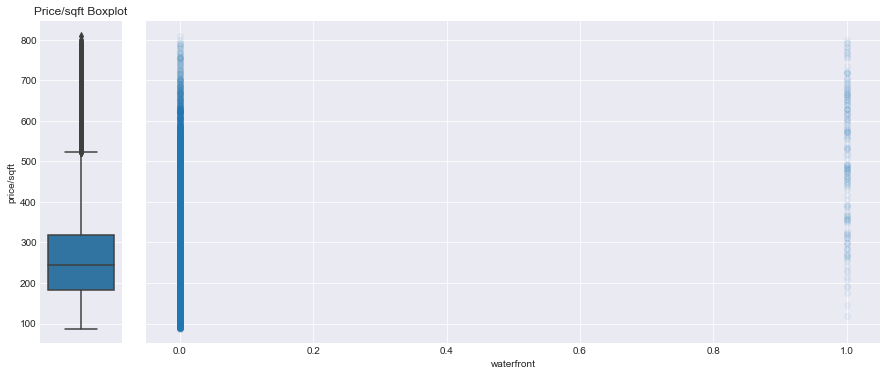

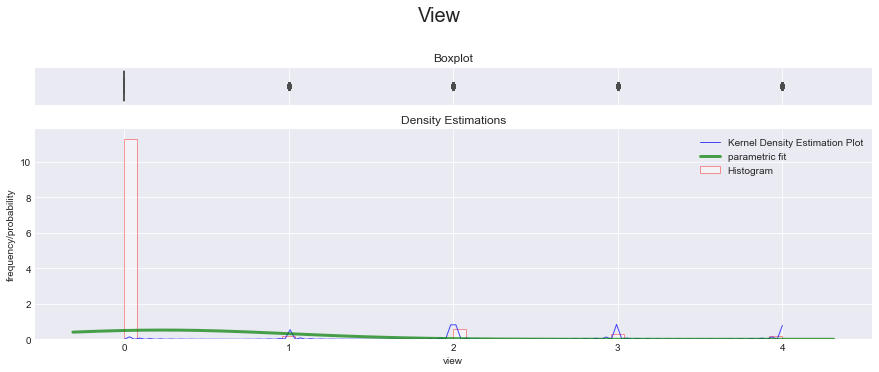

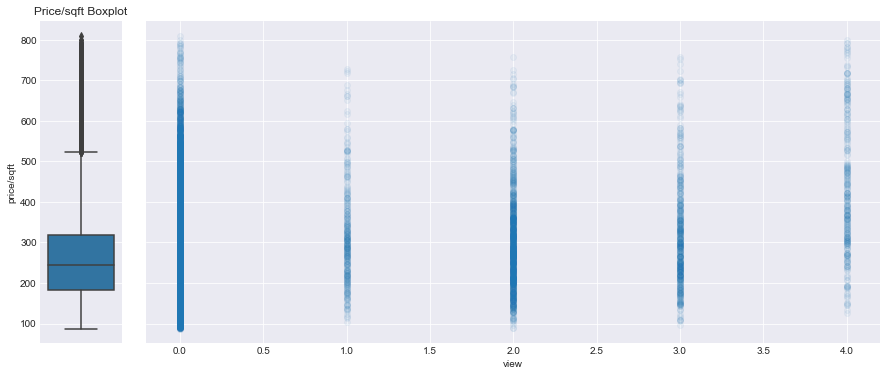

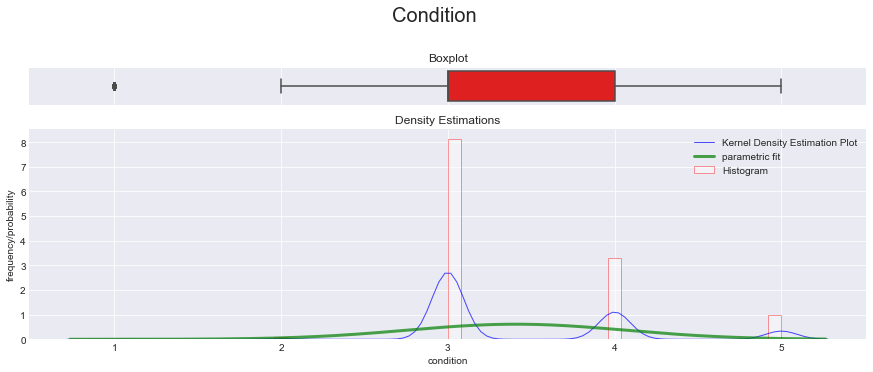

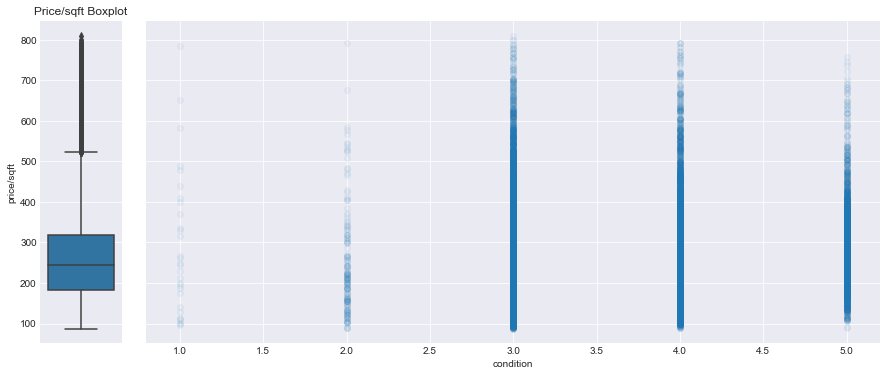

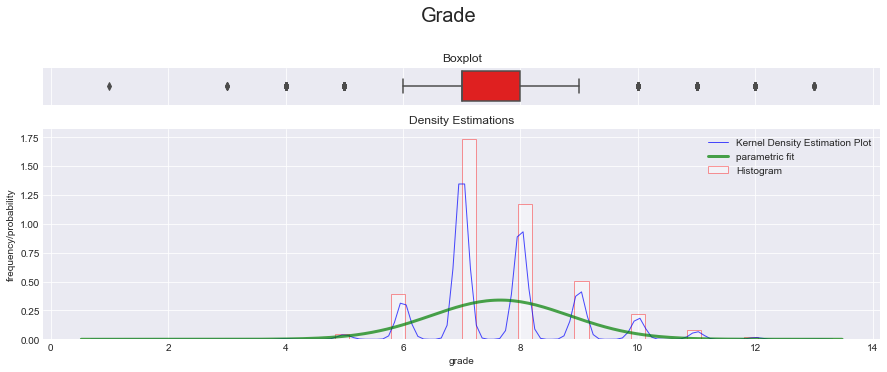

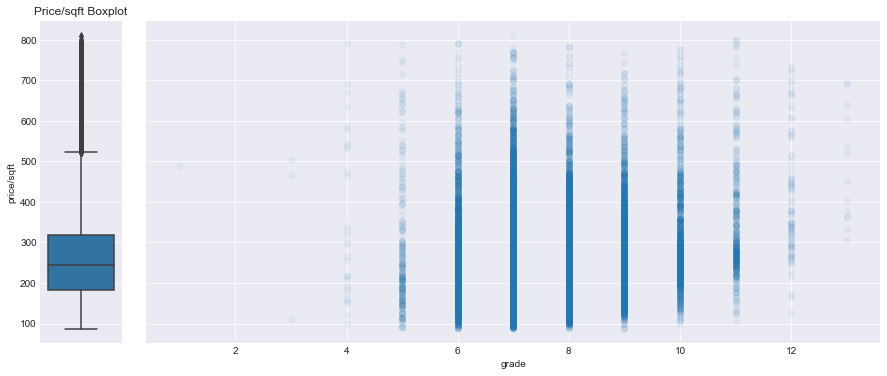

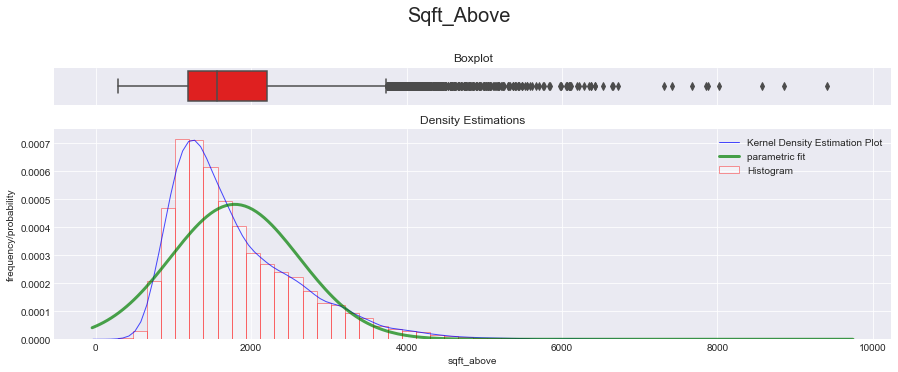

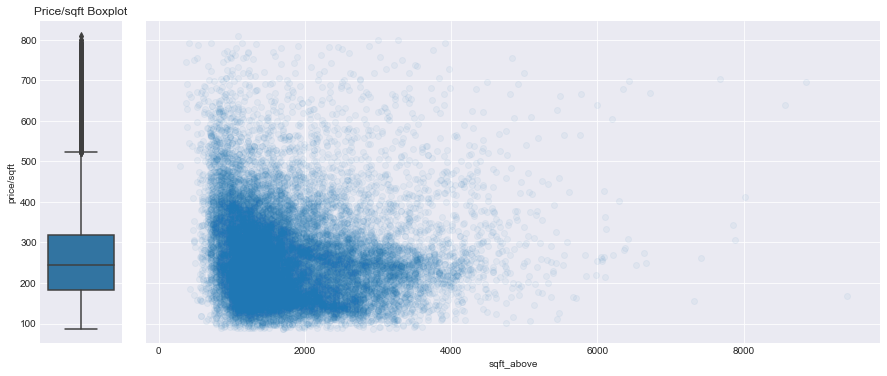

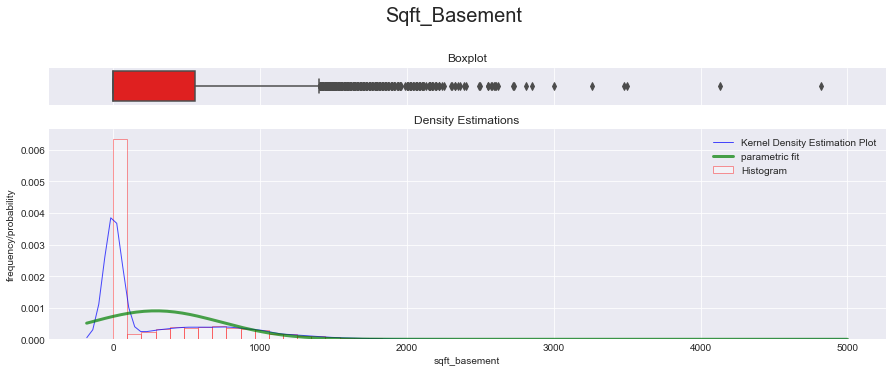

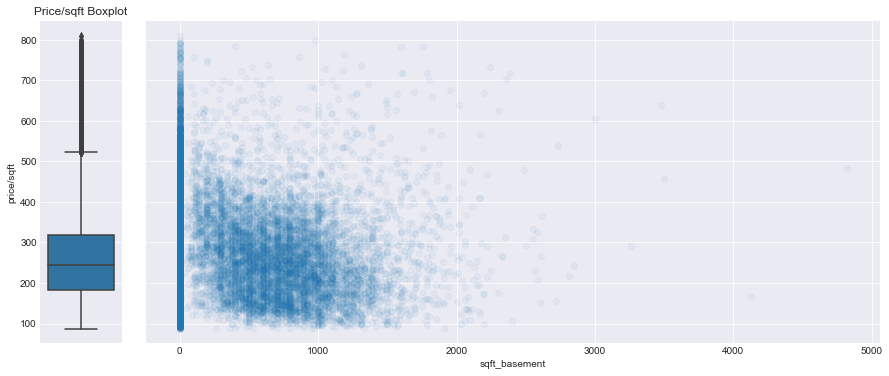

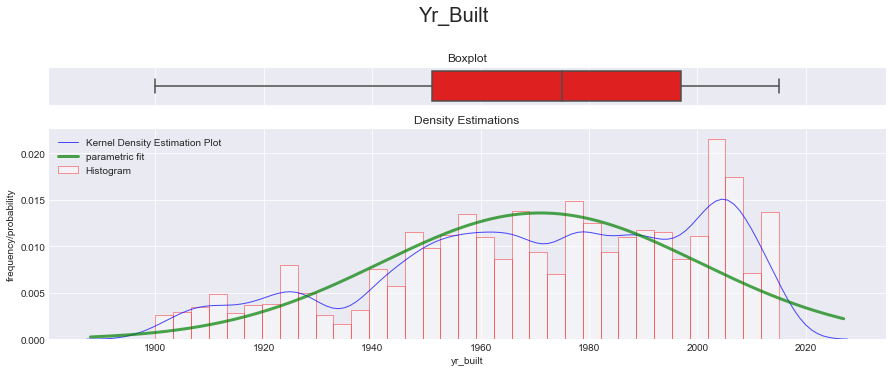

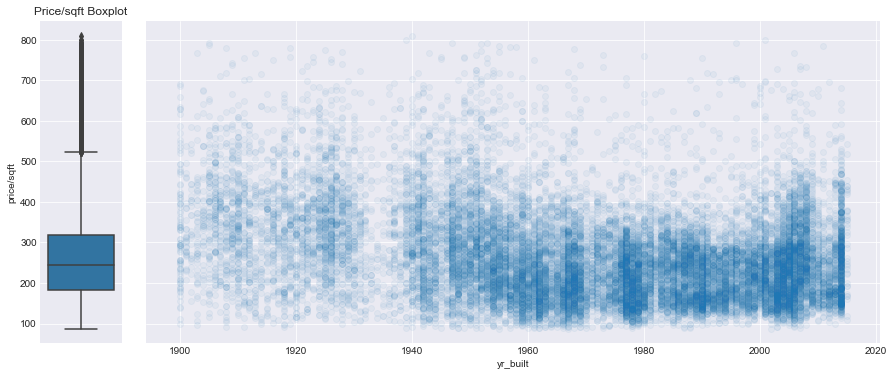

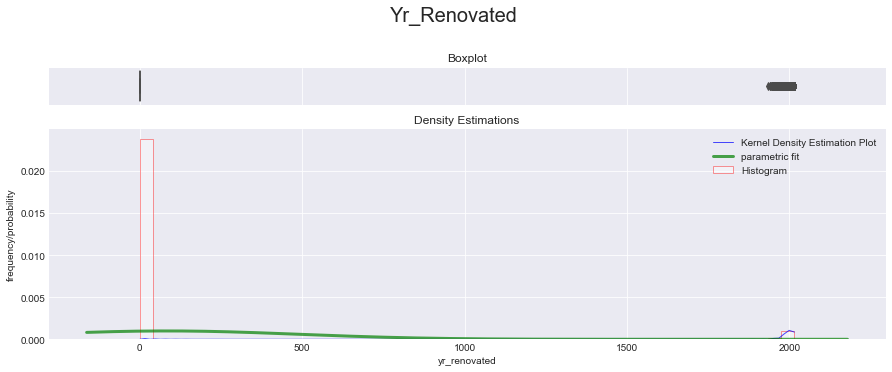

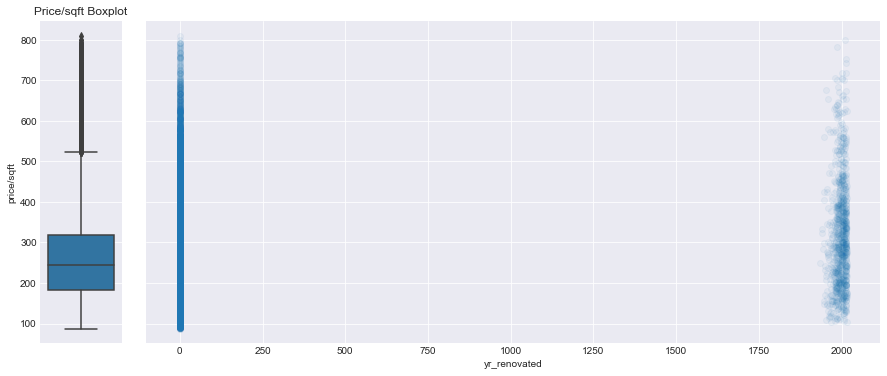

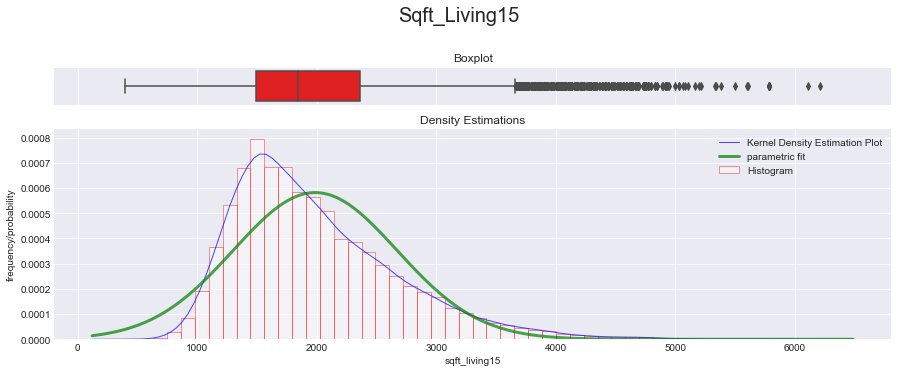

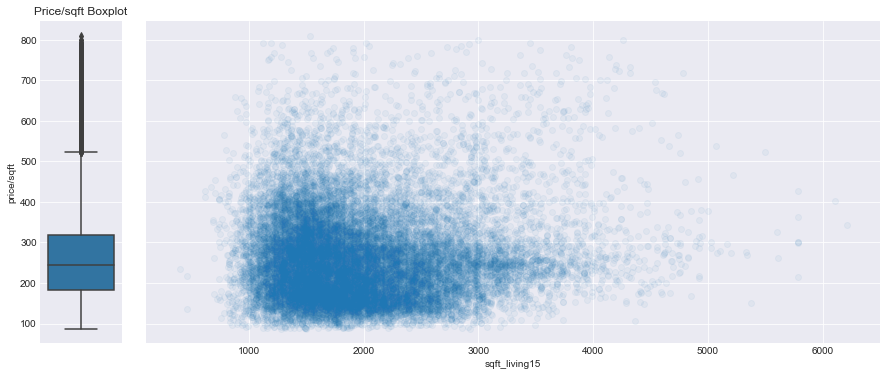

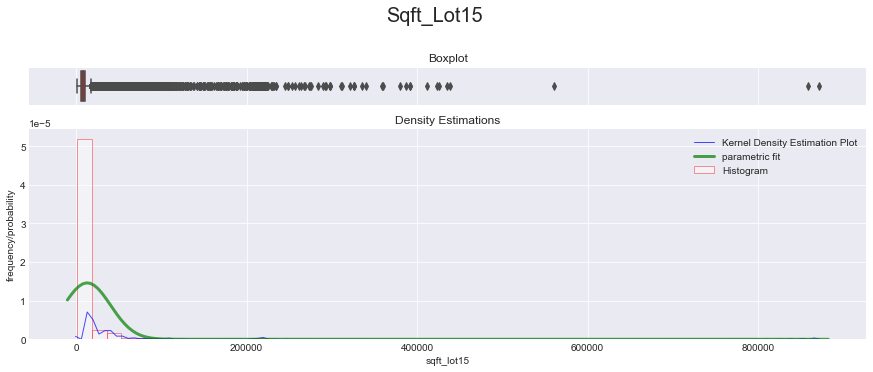

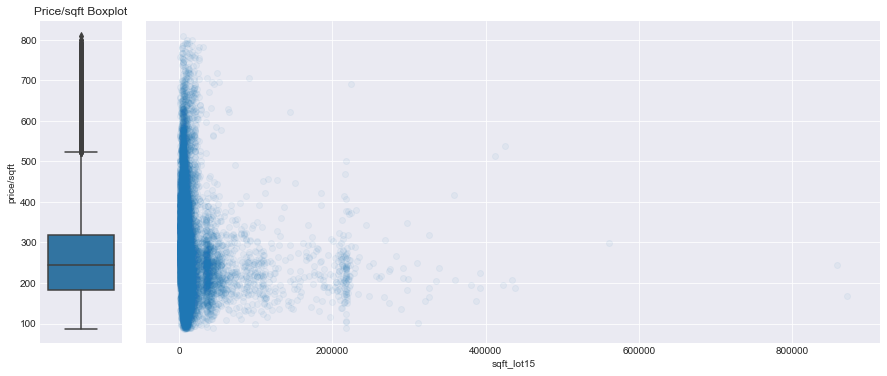

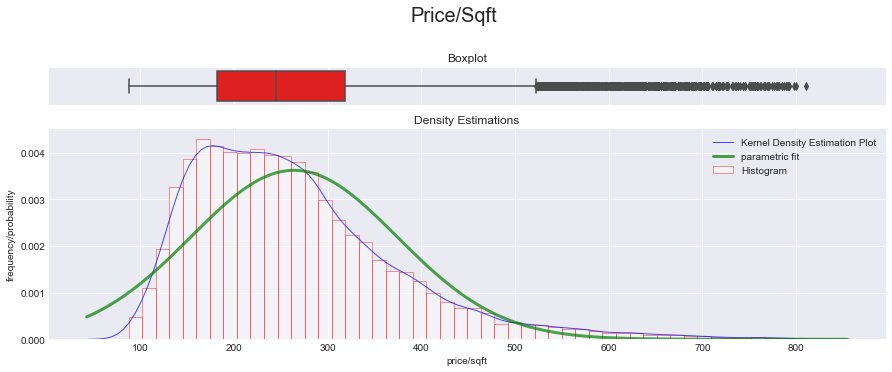

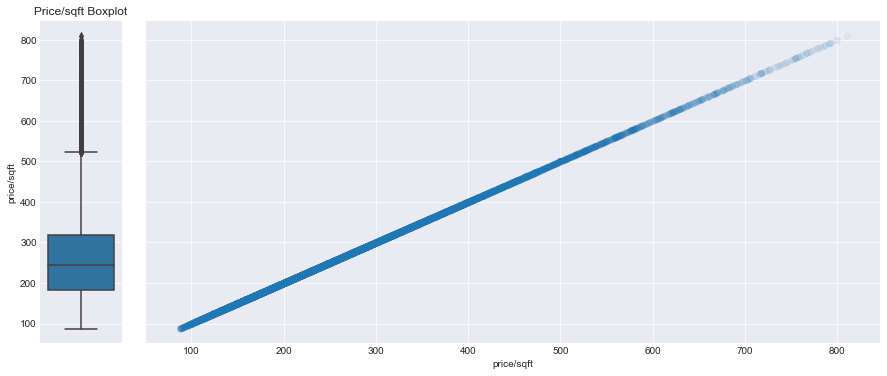

In [9]:
import scipy.stats as stats

not_to_plot = ['coord', 'id', 'price', 'date', 'zipcode','lat', 'long', 'price' ]
to_plot = [col for col in df.keys() if col not in not_to_plot]

for col in to_plot:
    
    fig, axes = plt.subplots(2, sharex='col', 
                                  gridspec_kw={"height_ratios": (.15, .85)}, figsize = (15,5) )
    fig.suptitle(col.title(), fontsize=20).set_position([.5, 1.05])
    
    
    
    # top  plot
    sns.boxplot(x=df[col], ax = axes[0],color = 'red')
    axes[0].set_title('Boxplot', fontsize=12)
    axes[0].set_xlabel('')

    
    # middle plot
    sns.distplot(df[col], 
                 hist=True, 
                 hist_kws={"linewidth": 1,"edgecolor" :'red', "alpha": 0.4,
                           "color":  "w", "label": "Histogram"},
                 kde=True, kde_kws = {'linewidth': 1, 'color': "blue", 
                                      "alpha": 0.7,
                                      'label':'Kernel Density Estimation Plot'},
                 fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
                 ax=axes[1])
    
    
    axes[1].set_title('Density Estimations', fontsize=12)
    axes[1].set_ylabel('frequency/probability')
    axes[1].set_xlabel(col)
    axes[1].legend()
    
    plt.show()
    
    
    ################
    fig2, axes2 = plt.subplots(1, 2, sharey='row', 
                             gridspec_kw={"width_ratios": (.1, .9)}, figsize = (12.3,5) )
    fig2.tight_layout()
    # bottom left plot
    sns.boxplot(y="price/sqft", data=df, ax=axes2[0])
    #axes2[0].set_xticks([])
    axes2[0].set_xlabel('')
    axes2[0].set_title('Price/sqft Boxplot', fontsize=12)

    
    
    
    # bottom right plot
    axes2[1].scatter(df[col], df["price/sqft"],alpha=.051)
    axes2[1].set_xlabel(col)
    axes2[1].set_ylabel('')

    #plt.legend();
    plt.show()

In [10]:


def create_colinearity_df(correlation_hurdle, variables_list, df):
    """Function that finds which variables have correlation above a 
    certain threshold.
    
    ***
    Function takes in as arguments a correlation hurdle, a list of variables 
    and a Data Frame.
    
    Returns a correlation matrix as a pandas Data Frame
    ***
    Arguments:
    - correlation_hurdle : float between 0 and 1
    - variables_list: list of strings with variable names. Must be a column 
    name of the provided data frame
    - df : a DataFrame containing the data for the variables.
    
    """
    
    # creates a new df from a correlation matrix
    # multi index structure 
    correlations_df = pd.DataFrame(
        df[variables_list].corr().stack()).reset_index()
    
    # removes redundant correlations
    index_drop = correlations_df[
        correlations_df['level_0'] == correlations_df['level_1']].index
    correlations_df.drop(index=index_drop, inplace=True)

    # renames columns, resets index
    correlations_df.columns= ['x', 'y', 'corr']
    correlations_df.reset_index(inplace=True)
    correlations_df.drop(columns='index', inplace=True)
    
    # creates new column with the correlated pairs
    correlations_df['pair'] = list(zip(correlations_df['x'], correlations_df['y']))
    
    # drops columns used to create the pairs' column
    correlations_df.drop(columns=['x', 'y'], inplace=True)
    
    # sets the pairs as new index
    correlations_df.set_index('pair', inplace=True)
    
    # drops duplicates
    correlations_df.drop_duplicates(inplace=True)

    
    # returns only pairs with correlation above hurdle
    return correlations_df[abs(correlations_df['corr']) > correlation_hurdle]

create_colinearity_df(0.70, to_plot, df)

,corr
pair,
"(bathrooms, sqft_living)",0.754665
"(sqft_living, grade)",0.762704
"(sqft_living, sqft_above)",0.876597
"(sqft_living, sqft_living15)",0.756420
"(sqft_lot, sqft_lot15)",0.718557
"(grade, sqft_above)",0.755923
"(grade, sqft_living15)",0.713202
"(sqft_above, sqft_living15)",0.731870


C:\Users\felip\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\felip\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\felip\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\felip\anaconda3\envs\learn-env\lib\site-pack

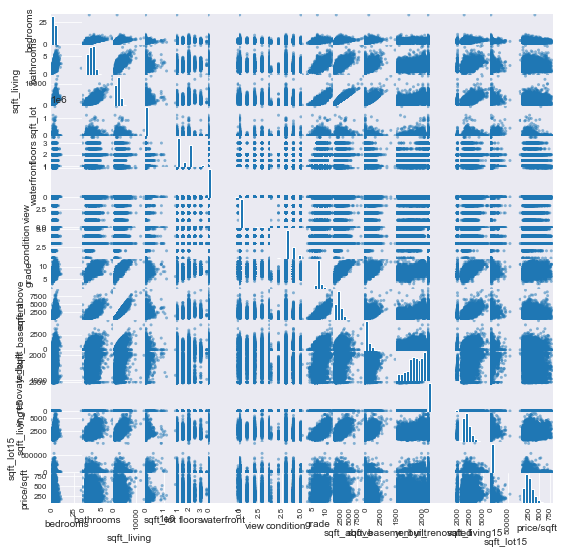

In [11]:
pd.plotting.scatter_matrix(df[to_plot],figsize =[9, 9]);